In [2]:
import numpy as np
from graphviz import Digraph

from cdcm import *

# Doubly Coupled System

Let us consider how a doubly coupled system can be modelled and simulated using CDCM. Here we consider a combined system consisting of 3 systems:<br><br>
**system 0**: A clock system which keeps track of time. This system takes the time step $dt$ as input<br><br> 

system 0: Clock system


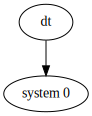

In [3]:
print('system 0: Clock system')
g = Digraph('clock system')
g.node('dt')
g.node('system 0')
g.edge('dt', 'system 0')
#g.render('Function', format='png')
g

**system 1**: A system with following variables.<br>

| Variable type | name | Unit | Description|
| :- | -: | :-: | :-: |
| State | $x_1$| m | state of system 1 |
| Parameter | $r_1$| m/s | rate parameter of system 1 |
| Parameter | $c_1$| 1/s | coupling coefficient 1 |
| Parameter | $s_1$| m | Standard deviation of measurement noise|
| Parameter | $y_1$| m | Sensor measurement of system 1|

<br>system1 has following functions:<br>
- Transition function of $x_1$:
$f_1(x_1, r_1, c_1,x_2, dt) = x_1 + r_1 * dt + c_1 * x_2 * dt$
- Emission function of $x_1$:
$y_1 = g_1(x_1, s_1) = x_1 + s_1 * guassian\ noise$

system 1


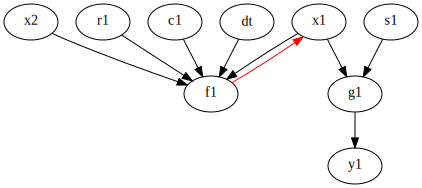

In [5]:
print('system 1')
from graphviz import Digraph
g = Digraph('system 1')
g.node('x1', label='<x<sub>1</sub>>')
g.node('x2', label='<x<sub>2</sub>>')
g.node('r1', label='<r<sub>1</sub>>')
g.node('c1', label='<c<sub>1</sub>>')
g.node('s1', label='<s<sub>1</sub>>')
g.node('dt')
g.node('y1', label='<y<sub>1</sub>>')
g.node('f1', label='<f<sub>1</sub>>')
g.node('g1', label='<g<sub>1</sub>>')
g.edge('x1', 'f1')
g.edge('r1', 'f1')
g.edge('c1', 'f1')
g.edge('x2', 'f1')
g.edge('dt', 'f1')
g.edge('f1', 'x1', color="red")
g.edge('x1', 'g1')
g.edge('s1', 'g1')
g.edge('g1', 'y1')
#g.render('Function', format='png')
g

**system 2**: A system with following variables.<br>

| Variable type | name | Unit | Description|
| :- | -: | :-: | :-: |
| State | $x_2$| m | state of system 2 |
| Parameter | $r_2$| m/s | rate parameter of system 2 |
| Parameter | $c_2$| 1/s | coupling coefficient 2 |
| Parameter | $s_2$| m | Standard deviation of measurement noise|
| Parameter | $y_2$| m | Sensor measurement of system 2|

<br>system 2 has following functions:<br>
- Transition function of $x_2$:
$f_2(x_2, x_1, r_2, c_2, dt) = x_2 + r_2 * dt + c_2*x_1*dt$
- Emission function of $x_2$:
$y_2 = g_2(x_2, s_2) = x_2 + s_2 * guassian\ noise$

system 2


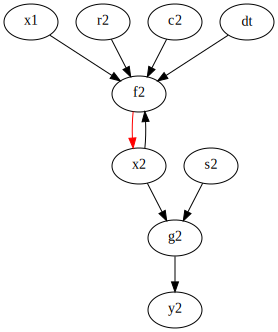

In [7]:
print('system 2')
from graphviz import Digraph
g = Digraph('system 1')
g.node('x1', label='<x<sub>1</sub>>')
g.node('x2', label='<x<sub>2</sub>>')
g.node('r2', label='<r<sub>2</sub>>')
g.node('c2', label='<c<sub>2</sub>>')
g.node('s2', label='<s<sub>2</sub>>')
g.node('dt')
g.node('y2', label='<y<sub>2</sub>>')
g.node('f2', label='<f<sub>2</sub>>')
g.node('g2', label='<g<sub>2</sub>>')
g.edge('x1', 'f2')
g.edge('x2', 'f2')
g.edge('r2', 'f2')
g.edge('dt', 'f2')
g.edge('c2', 'f2')
g.edge('f2', 'x2', color="red")
g.edge('x2', 'g2')
g.edge('s2', 'g2')
g.edge('g2', 'y2')
#g.render('Function', format='png')
g

State of system 1 ```x1``` is dependent on system 2 state ```x2``` and vice versa. Hence we have a doubly coupled system here. Two systems are coupled via the coupling coefficients included in the corresponding transition functions. Shown below is the DAG of doubly coupled system.

Doubly coupled system


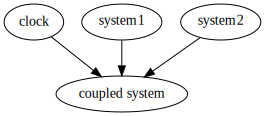

In [8]:
print('Doubly coupled system')
from graphviz import Digraph
g = Digraph('system')
g.node('clock')
g.node('sys1', label='<system<sub>1</sub>>')
g.node('sys2', label='<system<sub>2</sub>>')
g.node('coupled system')
g.edge('clock', 'coupled system')
g.edge('sys1', 'coupled system')
g.edge('sys2', 'coupled system')
#g.render('Function', format='png')
g

## System creation - Manual method

The nodes are declared initially. System is created by manually adding the nodes to the system.

In [3]:
# ****************************
# System 0
# ****************************
clock = make_clock(0.1)

While creating system 1 nodes, a variable called ```placeholder``` is created to use as the state variable ```x2``` while defining ```f2``` on a temporary basis as ```x2``` is not yet defined. Note that this placeholder variable is not added as a system node while creating system.

In [4]:
# ****************************
#       SYSTEM 1
# ****************************

x1 = make_node("S:x1:0.1:meters", description="State of sys1.")
r1 = make_node("P:r1:1.2:meters/second", description="Rate parameter for sys1.")
c1 = make_node("P:c1:0.1:1/second", description="Coupling coefficient.")
s1 = make_node(
    "P:s1:0.01:meters",
    description="Standard deviation of measurement noise"
)
y1 = make_node("V:y1", units="meters", description="Sensor measurement sys1.")

# This is a placeholder node used to establish the connection between
# the two systems:
placeholder = make_node("V:placeholder", units="meters", description="Input from sys2.")

@make_function(x1)
def f1(x1=x1, r1=r1, c1=c1, x2=placeholder, dt=clock.dt):
    """Transition function for sys1."""
    return x1 + r1 * dt + c1 * x2 * dt

@make_function(y1)
def g1(x1=x1, s1=s1):
    """Emission function for sys1."""
    return x1 + s1 * np.random.randn()

# You do not have to put the placeholder node in the system nodes
sys1 = System(
    name="sys1",
    nodes=[x1, r1, c1, f1, s1, y1, g1]
)

In [5]:
# ****************************
#       SYSTEM 2
# ****************************

x2 = make_node("S:x1:0.3:meters")
r2 = make_node("P:r2:1.2:meters/second",)
c2 = make_node("P:c2:20.1:1/second")
s2 = make_node(
    "P:s2:0.01:meters",
    description="Standard deviation of measurement noise"
)
y2 = make_node("V:y2", units="meters", description="Sensor measurement sys2.")


@make_function(x2)
def f2(x2=x2, x1=sys1.x1, r2=r2, c2=c2, dt=clock.dt):
    """Another simple system."""
    return x2 + r2 * dt + c2 * x1 * dt

@make_function(y2)
def g2(x2=x2, s2=s2):
    """Emission function for sys2."""
    return x2 + s2 * np.random.randn()

sys2 = System(
    name="sys2",
    nodes=[x2, r2, c2, f2, s2, y2, g2]
)

As we have system 2 defined now, we no longer requires placeholder. Hence we replace placeholder with x2.

In [6]:
# ****************************
#   CONNECT SYSTEMS
# ****************************
replace(placeholder, x2)

In [7]:
# ****************************
#       COMBINED SYSTEM
# ****************************

sys = System(
    name="combined_system",
    nodes=[clock, sys1, sys2]
)

printing the system will output a dictionary of yaml format.

In [8]:
print(sys)

combined_system:
  description: ''
  owner: ''
  nodes:
    clock:
      description: A system that counts time.
      owner: combined_system
      nodes:
        dt:
          description: The timestep.
          owner: combined_system/clock
          parents: ()
          children: ('tick', 'combined_system/sys1/f1', 'combined_system/sys2/f2')
          value: 0.1
          units: seconds
          track: true
        t:
          description: The time.
          owner: combined_system/clock
          parents: ('tick',)
          children: ('tick',)
          value: 0.0
          units: seconds
          track: true
        tick:
          description: Moves time forward by `dt`.
          owner: combined_system/clock
          parents: ('t', 'dt')
          children: ('t',)
          func: !!python/name:cdcm.clock.tick ''
    sys1:
      description: ''
      owner: combined_system
      nodes:
        x1:
          description: State of sys1.
          owner: combined_system/sys1
 

### Simulating the system

In [9]:
for i in range(10):
    sys.forward()
    print(f"y1: {sys1.y1.value:1.2f}, y2: {sys2.y2.value:1.2f}")
    sys.transition()

y1: 0.09, y2: 0.30
y1: 0.47, y2: 0.63
y1: 1.21, y2: 1.68
y1: 3.23, y2: 4.23
y1: 8.36, y2: 10.86
y1: 21.50, y2: 27.77
y1: 55.11, y2: 71.10
y1: 141.16, y2: 181.98
y1: 361.39, y2: 465.85
y1: 925.07, y2: 1192.36


## System creation - Using 'with' context

The nodes are created under the context of the system of which the nodes are part of. No need to manually add nodes to the system.

In [11]:
with System(name="combined_system") as sys:

    # ****************************
    # System 0
    # ****************************
    clock = make_clock(0.1)


    # ****************************
    #       SYSTEM 1
    # ****************************

    with System(name="sys1") as sys1:
        x1 = make_node("S:x1:0.1:meters", description="State of sys1.")
        r1 = make_node("P:r1:1.2:meters/second", description="Rate parameter for sys1.")
        c1 = make_node("P:c1:0.1:1/second", description="Coupling coefficient.")
        s1 = make_node(
            "P:s1:0.01:meters",
            description="Standard deviation of measurement noise"
        )
        y1 = make_node("V:y1", units="meters", description="Sensor measurement sys1.")

        # This is a placeholder node used to establish the connection between
        # the two systems:
        placeholder = make_node("V:placeholder", units="meters", description="Input from sys2.")

        @make_function(x1)
        def f1(x1=x1, r1=r1, c1=c1, x2=placeholder, dt=clock.dt):
            """Transition function for sys1."""
            return x1 + r1 * dt + c1 * x2 * dt

        @make_function(y1)
        def g1(x1=x1, s1=s1):
            """Emission function for sys1."""
            return x1 + s1 * np.random.randn()

    # ****************************
    #       SYSTEM 2
    # ****************************

    with System(name="sys2") as sys2:
        x2 = make_node("S:x1:0.3:meters")
        r2 = make_node("P:r2:1.2:meters/second",)
        c2 = make_node("P:c2:20.1:1/second")
        s2 = make_node(
            "P:s2:0.01:meters",
            description="Standard deviation of measurement noise"
        )
        y2 = make_node("V:y2", units="meters", description="Sensor measurement sys2.")


        @make_function(x2)
        def f2(x2=x2, x1=sys1.x1, r2=r2, c2=c2, dt=clock.dt):
            """Another simple system."""
            return x2 + r2 * dt + c2 * x1 * dt

        @make_function(y2)
        def g2(x2=x2, s2=s2):
            """Emission function for sys2."""
            return x2 + s2 * np.random.randn()

    # ****************************
    #   CONNECT SYSTEMS
    # ****************************
    replace(placeholder, x2)

print(sys)

combined_system:
  description: ''
  owner: ''
  nodes:
    dt:
      description: The timestep.
      owner: combined_system/clock
      parents: ()
      children: ('tick', 'combined_system/sys1/f1', 'combined_system/sys2/f2')
      value: 0.1
      units: seconds
      track: true
    t:
      description: The time.
      owner: combined_system/clock
      parents: ('tick',)
      children: ('tick',)
      value: 0.0
      units: seconds
      track: true
    tick:
      description: Moves time forward by `dt`.
      owner: combined_system/clock
      parents: ('t', 'dt')
      children: ('t',)
      func: &id001 !!python/name:cdcm.clock.tick ''
    clock:
      description: A system that counts time.
      owner: combined_system
      nodes:
        dt:
          description: The timestep.
          owner: combined_system/clock
          parents: ()
          children: ('tick', 'combined_system/sys1/f1', 'combined_system/sys2/f2')
          value: 0.1
          units: seconds
     

In [13]:
for i in range(10):
    sys.forward()
    print(f"y1: {sys1.y1.value:1.2f}, y2: {sys2.y2.value:1.2f}")
    sys.transition()

y1: 0.09, y2: 0.28
y1: 0.46, y2: 0.63
y1: 1.20, y2: 1.68
y1: 3.25, y2: 4.23
y1: 8.36, y2: 10.87
y1: 21.49, y2: 27.79
y1: 55.11, y2: 71.11
y1: 141.16, y2: 182.02
y1: 361.39, y2: 465.85
y1: 925.05, y2: 1192.34


As we can see, system creation using ```with``` context manager of python has made the code more compact and understandable.